In [5]:
import numpy as np
import cv2 as cv
import math
from settings import Settings

https://stackoverflow.com/questions/64825835/opencv-python-how-to-warpperspective-a-large-image-based-on-transform-inferred

In [6]:
# corner scale factor
TL = [426/1860,159/1046]
TR = [1434/1860, 159/1046]
BR = [1521/1860, 1]
BL = [338/1860, 1]


In [7]:
imgPath = "tiles/medium.png"
img = cv.imread(imgPath)

In [8]:
height, width, _ = img.shape
print(width,height)
# normalised tile scale factor
tilePerWidth = width/27.35
tilePerHeight = height/16.97

1340 754


In [9]:
# Specify input coordinates for corners in order TL, TR, BR, BL as x, y
inputCorners = np.float32([[TL[0]*width,TL[1]*height], [TR[0]*width,TR[1]*height], [BR[0]*width,BR[1]*height], [BL[0]*width,BL[1]*height]])
inputCorners

array([[ 306.90323,  114.61377],
       [1033.0968 ,  114.61377],
       [1095.7742 ,  754.     ],
       [ 243.50537,  754.     ]], dtype=float32)

In [10]:
# Calculate the width and height of the new perspective
outputWidth = round(math.hypot(inputCorners [0, 0] - inputCorners [1, 0], inputCorners [0, 1] - inputCorners [1, 1]))
outputHeight = round(math.hypot(inputCorners [0, 0] - inputCorners [3, 0], inputCorners [0, 1] - inputCorners [3, 1]))
outputHeight

643

In [11]:
# Set the upper left coordinates for the output rectangle
x, y = inputCorners[0, 0], inputCorners[0, 1]

# Specify output coordinates for corners of red quadrilateral in order TL, TR, BR, BL as x, y
outputCorners = np.float32([[x, y], [x + outputWidth, y], [x + outputWidth, y + outputHeight], [x, y + outputHeight]])

# Compute the perspective transformation matrix
matrix = cv.getPerspectiveTransform(inputCorners, outputCorners)
print(matrix)
# Apply the perspective transformation
imgOutput = cv.warpPerspective(img, matrix, (width, height), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT, borderValue=(0, 0, 0))

[[ 1.03184526e+00  1.88321233e-01 -2.14997578e+01]
 [-1.55625366e-16  1.25027460e+00 -2.50034728e+01]
 [-2.64481057e-20  2.80249247e-04  1.00000000e+00]]


In [12]:
# Function to transform a coordinate from the input plane to the output plane
def transform_coordinate(matrix, point):
    pointHomogeneous = np.array([point[0], point[1], 1.0])
    transformedPointHomogeneous = np.dot(matrix, pointHomogeneous)
    transformedPointHomogeneous /= transformedPointHomogeneous[2]
    return int(transformedPointHomogeneous[0]), int(transformedPointHomogeneous[1])

In [13]:
from scipy.spatial import distance
a = (1, 2)
b = (4, 5)
dst = distance.euclidean(a, b)
print(dst)
print(np.subtract(a,b))

4.242640687119285
[-3 -3]


In [14]:
def calculate_tile_distance(a,b,matrix):
    # normalise the two point by their perspective
    a = transform_coordinate(matrix, a)
    b = transform_coordinate(matrix, b)
    differences = np.subtract(a,b)
    tileDiffX = differences[0]/tilePerWidth
    tileDiffY = differences[1]/tilePerHeight
    print(tileDiffX,tileDiffY)
    return math.sqrt(tileDiffX**2+tileDiffY**2)


In [18]:
# Example coordinate to transform
inputCord1 = (int(1790/1860*width), int(251/1046*height))
outputCord1 = transform_coordinate(matrix, inputCord1)

inputCord2 = (int(width/2),int(height/2+Settings.midpoint_offset))
outputCord2 = transform_coordinate(matrix, inputCord2)

print(calculate_tile_distance(inputCord1,inputCord2,matrix))
cv.line(img,inputCord1,inputCord2,(0,0,255),3)
cv.line(imgOutput,outputCord1,outputCord2,(0,0,255),3)


12.389141791044777 -5.086498673740053
13.392658551481535


array([[[ 46,  88, 168],
        [ 46,  90, 172],
        [ 49, 104, 207],
        ...,
        [114, 158, 244],
        [114, 158, 244],
        [114, 158, 244]],

       [[ 46,  87, 168],
        [ 46,  89, 171],
        [ 49, 104, 208],
        ...,
        [114, 158, 244],
        [114, 158, 244],
        [114, 158, 244]],

       [[ 46,  87, 168],
        [ 47,  94, 184],
        [ 49, 105, 209],
        ...,
        [114, 158, 244],
        [114, 158, 244],
        [114, 158, 244]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

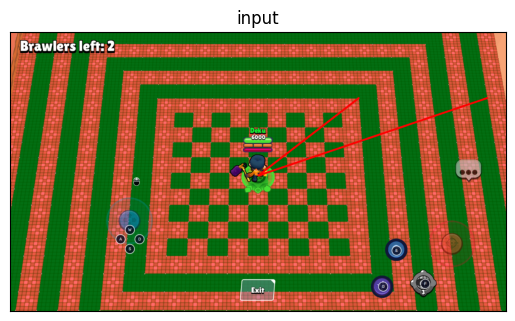

In [19]:
from matplotlib import pyplot as plt
plt.imshow( cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('input')
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

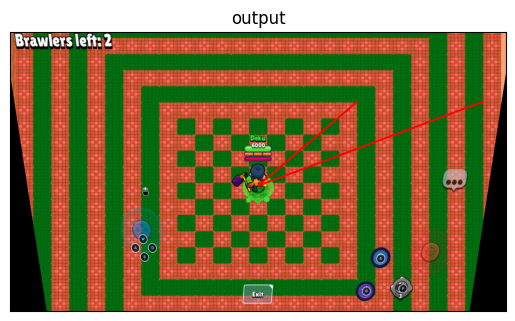

In [20]:
plt.imshow( cv.cvtColor(imgOutput, cv.COLOR_BGR2RGB))
plt.title('output')
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

In [ ]:
boolean = []


In [13]:
import cv2
import numpy as np
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator, colors
from mss import mss

model = YOLO("yolov8_model\\yolov8.engine")
names = model.names


with mss() as sct:
    monitor = sct.monitors[1]
    while True:
        screenshot = sct.grab(monitor)
        frame = np.array(screenshot)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGRA2BGR)
        if monitor:
            results = model.track(frame, persist=True, verbose=False)
            boxes = results[0].boxes.xyxy.cpu()

            if results[0].boxes.id is not None:

                # Extract prediction results
                clss = results[0].boxes.cls.cpu().tolist()
                track_ids = results[0].boxes.id.int().cpu().tolist()
                confs = results[0].boxes.conf.float().cpu().tolist()

                # Annotator Init
                annotator = Annotator(frame, line_width=2)

                for box, cls, track_id in zip(boxes, clss, track_ids):
                    annotator.box_label(box, color=colors(int(cls), True), label=names[int(cls)])
            cv2.imshow('Frame', frame)
            if cv2.waitKey(1) & 0xFF == ord("q"):
                break
        else:
            break
    cv2.destroyAllWindows()

WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading yolov8_model\yolov8.engine for TensorRT inference...


In [43]:
import numpy as np

arr = np.array((4, 1), dtype='i,i')
print(arr)
np.append(arr[1],[(2,4)])
print(arr)

(4, 1)


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [1]:
import numpy as np

def iou(box1, box2):
    # Calculate the (x, y)-coordinates of the intersection rectangle
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])

    # Compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # Compute the area of both the prediction and ground-truth rectangles
    box1Area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2Area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)

    # Compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the intersection area
    iou = interArea / float(box1Area + box2Area - interArea)

    return iou

def non_max_suppression(boxes, scores, iou_threshold):
    if len(boxes) == 0:
        return []

    # Initialize the list of picked indexes
    indices = []

    # Sort the bounding boxes by their associated scores in descending order
    sorted_indices = np.argsort(scores)[::-1]

    while len(sorted_indices) > 0:
        # Pick the top box and add its index to the indices list
        current = sorted_indices[0]
        indices.append(current)

        # Compute the IoU of the current box with the rest
        rest_indices = sorted_indices[1:]
        ious = np.array([iou(boxes[current], boxes[i]) for i in rest_indices])

        # Keep boxes with an IoU below the threshold
        filtered_indices = rest_indices[ious < iou_threshold]
        sorted_indices = filtered_indices

    return indices

# Example usage:
boxes = [
    [100, 100, 210, 210],  # Box 1
    [105, 105, 215, 215],  # Box 2
    [200, 200, 310, 310],  # Box 3
]

scores = [0.9, 0.85, 0.75]  # Confidence scores

iou_threshold = 0.5

# Perform non-maximum suppression
selected_indices = non_max_suppression(boxes, scores, iou_threshold)
selected_boxes = [boxes[i] for i in selected_indices]

print("Selected boxes after NMS:", selected_boxes)


Selected boxes after NMS: [[100, 100, 210, 210], [200, 200, 310, 310]]


In [3]:
import numpy as np

def iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    box1Area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2Area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    iou = interArea / float(box1Area + box2Area - interArea)
    return iou

def merge_boxes(boxes, iou_threshold):
    def find(parent, i):
        if parent[i] != i:
            parent[i] = find(parent, parent[i])
        return parent[i]

    def union(parent, rank, i, j):
        root_i = find(parent, i)
        root_j = find(parent, j)
        if root_i != root_j:
            if rank[root_i] > rank[root_j]:
                parent[root_j] = root_i
            elif rank[root_i] < rank[root_j]:
                parent[root_i] = root_j
            else:
                parent[root_j] = root_i
                rank[root_i] += 1

    n = len(boxes)
    parent = list(range(n))
    rank = [0] * n

    for i in range(n):
        for j in range(i + 1, n):
            if iou(boxes[i], boxes[j]) > iou_threshold:
                union(parent, rank, i, j)

    merged_boxes = {}
    for i in range(n):
        root = find(parent, i)
        if root not in merged_boxes:
            merged_boxes[root] = boxes[i]
        else:
            x_min = min(merged_boxes[root][0], boxes[i][0])
            y_min = min(merged_boxes[root][1], boxes[i][1])
            x_max = max(merged_boxes[root][2], boxes[i][2])
            y_max = max(merged_boxes[root][3], boxes[i][3])
            merged_boxes[root] = [x_min, y_min, x_max, y_max]

    return list(merged_boxes.values())

# Example usage:
boxes = [
    [100, 100, 210, 210],  # Box 1
    [105, 105, 215, 215],  # Box 2
    [200, 200, 310, 310],  # Box 3
]

iou_threshold = 0.5

# Merge overlapping bounding boxes
merged_boxes = merge_boxes(boxes, iou_threshold)

print("Merged boxes:", merged_boxes)



Merged boxes: [[100, 100, 310, 310]]


In [1]:
# from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder

matrix = [
  [1, 1, 1, 1, 1, 1],
  [1, 0, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1]]

# 1. create the grid with the nodes 
grid = Grid(matrix=matrix)

# get start and end point 
start = grid.node(0, 0)
end = grid.node(5, 2)

# create a finder with the movement style 
finder = AStarFinder() # can add DiagonalMovement as argument here with never or always + more

# returns a list with the path and the amount of times the finder had to run to get the path 
path, runs = finder.find_path(start, end, grid)


# print result 
print(path)

[<GridNode(0:0 0x1e6dade30d0)>, <GridNode(1:0 0x1e6dc82eb50)>, <GridNode(2:0 0x1e6dc473a10)>, <GridNode(3:0 0x1e6dc471c90)>, <GridNode(4:0 0x1e6dc471390)>, <GridNode(5:0 0x1e6dc8b3d90)>, <GridNode(5:1 0x1e6dc8c52d0)>, <GridNode(5:2 0x1e6dc8c5490)>]


In [1]:
import cv2 as cv






27

In [6]:
def show_map(screenshot,map,spawnpoint,scale=5):
    h, w, _ = map.shape
    map = cv.resize(map,(scale*w,scale*h),interpolation = cv.INTER_NEAREST)
    cv.circle(map, tuple(scale*i for i in spawnpoint), 5, (255,0,0), 2)
    screenshot[0:scale*h, 0:scale*w] = map
    return screenshot


In [8]:
mapImg = cv.imread("skull_creek.png",1)
img = cv.imread("sc.png",1)
img = show_map(img,mapImg,(20,1))  
cv.imshow("test",img)
cv.waitKey(0)

62 62


KeyboardInterrupt: 

: 